# All Modality Exploration


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Grouping Analysis
In this notebook we take a look at each of the modalities and group individuals based:
1. established thresholds
2. natural cutpoints
3. and data-driven clusters

The plan is to create functions/classes here that can be adapted into the source code for future analysis.

In [19]:
import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np

import sys
sys.path.append("../")
from src.visualization import visualize

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import matplotlib.dates as mdates
from joypy import joyplot

from scipy import stats

# Table of Contents

1. [Fitbit Sleep](#fitbit_sleep)
2. [Self-Report Sleep](#self_report_sleep)
3. [Fitbit Activity](#fitbit_activity)
4. [Mood](#mood)
5. [Indoor Environmental Quality](#ieq)

<a id='fitbit_sleep'></a>

# Fitbit Sleep

## Data Import

In [5]:
fb_sleep = pd.read_csv("../data/processed/fitbit-sleep_summary-ux_s20.csv",parse_dates=["start_time","end_time","start_date","end_date"])#,index_col=["beiwe","start_time"])
fb_sleep.head()

,start_date,end_date,deep_count,deep_minutes,light_count,light_minutes,rem_count,rem_minutes,wake_count,wake_minutes,beiwe,efficiency,end_time,start_time,redcap,beacon,nrem_count,rem2nrem_count,nrem_minutes,rem2nrem_minutes,tst_fb
0,2020-05-14,2020-05-14,5,84,20,213,10,82,21,27,hfttkth7,97,2020-05-14 07:13:00,2020-05-14 00:27:00,NaN,NaN,25,0.400000,297,0.276094,6.766667
1,2020-05-14,2020-05-15,4,95,31,250,6,47,33,101,hfttkth7,87,2020-05-15 08:06:30,2020-05-14 23:53:30,NaN,NaN,35,0.171429,345,0.136232,8.216667
2,2020-05-15,2020-05-16,2,47,17,190,8,50,20,42,hfttkth7,95,2020-05-16 04:57:00,2020-05-15 23:28:00,NaN,NaN,19,0.421053,237,0.210970,5.483333
3,2020-05-17,2020-05-17,5,78,21,242,11,83,25,44,hfttkth7,96,2020-05-17 09:28:30,2020-05-17 02:01:30,NaN,NaN,26,0.423077,320,0.259375,7.450000
4,2020-05-18,2020-05-18,5,96,20,167,14,88,28,65,hfttkth7,92,2020-05-18 07:20:00,2020-05-18 00:24:00,NaN,NaN,25,0.560000,263,0.334601,6.933333


<a id='self_report_sleep'></a>

# Self-Report Sleep

In [6]:
beiwe_sleep = pd.read_csv("../data/processed/beiwe-morning_ema-ux_s20.csv",parse_dates=["timestamp"])
beiwe_sleep.head()

,timestamp,beiwe,content,stress,lonely,sad,energy,tst,sol,naw,restful,redcap,beacon
0,2020-05-13 09:10:27,qh34m4r9,3,0.0,0.0,0.0,1.0,8.0,20.0,2.0,3.0,68,19.0
1,2020-05-13 09:15:49,awa8uces,0.0,2.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,28,26.0
2,2020-05-13 09:42:19,xxvnhauv,1,1.0,1.0,3.0,0.0,6.0,30.0,3.0,1.0,21,22.0
3,2020-05-13 09:43:27,rvhdl2la,1,1.0,2.0,3.0,0.0,5.3,5.0,2.0,2.0,29,NaN
4,2020-05-13 10:11:51,q5y11ytm,3,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,48,NaN


<a id='fitbit_activity'></a>

# Fitbit Activity

In [7]:
fb_activity = pd.read_csv("../data/processed/fitbit-daily-ux_s20.csv",parse_dates=["timestamp"],index_col=["beiwe","timestamp"])
fb_activity.head()

calories     bmr  steps  distance  sedentary_minutes  \
beiwe    timestamp                                                          
hfttkth7 2020-05-13    2781.0  1876.0   9207  4.396294               1241   
         2020-05-14    3727.0  1876.0  15207  7.261114                614   
         2020-05-15    3909.0  1876.0  14556  8.028501                577   
         2020-05-16    3927.0  1876.0  18453  8.748670                760   
         2020-05-17    4180.0  1876.0  15425  7.973149                605   

                     lightly_active_minutes  fairly_active_minutes  \
beiwe    timestamp                                                   
hfttkth7 2020-05-13                      70                    118   
         2020-05-14                     263                    134   
         2020-05-15                     205                     57   
         2020-05-16                     176                     24   
         2020-05-17                     207                     50   

                     very_active_minutes  calories_from_activities     bmi  \
beiwe    timestamp                                                           
hfttkth7 2020-05-13                   11                    1097.0  23.754   
         2020-05-14                   23                    2234.0  23.754   
         2020-05-15                  108                    2381.0  23.754   
         2020-05-16                  151                    2364.0  23.754   
         2020-05-17                  131                    2652.0  23.754   

                     fat  weight  food_calories_logged  water_logged  
beiwe    timestamp                                                    
hfttkth7 2020-05-13  0.0   180.0                   0.0           0.0  
         2020-05-14  0.0   180.0                   0.0           0.0  
         2020-05-15  0.0   180.0                   0.0           0.0  
         2020-05-16  0.0   180.0                   0.0           0.0  
         2020-05-17  0.0   180.0                   0.0           0.0

<a id='mood'></a>

# Mood

In [8]:
mood = pd.read_csv("../data/processed/beiwe-daily_ema-ux_s20.csv",parse_dates=["timestamp_morning","timestamp_evening","date"],index_col=["beiwe","date"])
mood.sort_index(level="beiwe",inplace=True)
mood.head()

timestamp_morning content_morning  stress_morning  \
beiwe    date                                                             
15tejjtw 2020-05-14 2020-05-14 20:38:28               2             0.0   
         2020-05-16 2020-05-16 23:10:04               3             0.0   
         2020-05-17 2020-05-17 16:58:09               2             0.0   
         2020-05-20 2020-05-20 11:19:29               2             1.0   
         2020-05-22 2020-05-22 10:27:23               3             1.0   

                     lonely_morning  sad_morning  energy_morning  tst   sol  \
beiwe    date                                                                 
15tejjtw 2020-05-14             1.0          1.0             2.0  9.0  30.0   
         2020-05-16             1.0          0.0             2.0  9.0  15.0   
         2020-05-17             1.0          0.0             1.0  9.0  30.0   
         2020-05-20             1.0          0.0             2.0  8.0  15.0   
         2020-05-22             1.0          2.0             3.0  9.0  20.0   

                     naw  restful  redcap  beacon   timestamp_evening  \
beiwe    date                                                           
15tejjtw 2020-05-14  5.0      2.0      45     NaN 2020-05-14 20:37:44   
         2020-05-16  2.0      2.0      45     NaN 2020-05-16 23:09:42   
         2020-05-17  1.0      2.0      45     NaN 2020-05-17 22:11:03   
         2020-05-20  3.0      2.0      45     NaN 2020-05-20 19:48:42   
         2020-05-22  2.0      2.0      45     NaN 2020-05-22 19:44:15   

                     content_evening  stress_evening  lonely_evening  \
beiwe    date                                                          
15tejjtw 2020-05-14              2.0             0.0             2.0   
         2020-05-16              3.0             0.0             1.0   
         2020-05-17              3.0             0.0             1.0   
         2020-05-20              2.0             2.0             1.0   
         2020-05-22              2.0             1.0             2.0   

                     sad_evening  energy_evening  content_mean  stress_mean  \
beiwe    date                                                                 
15tejjtw 2020-05-14          1.0             2.0           2.0          0.0   
         2020-05-16          0.0             2.0           3.0          0.0   
         2020-05-17          0.0             2.0           3.0          0.0   
         2020-05-20          1.0             1.0           2.0          1.5   
         2020-05-22          1.0             1.0           2.0          1.0   

                     lonely_mean  sad_mean  energy_mean  
beiwe    date                                            
15tejjtw 2020-05-14          1.5       1.0          2.0  
         2020-05-16          1.0       0.0          2.0  
         2020-05-17          1.0       0.0          1.5  
         2020-05-20          1.0       0.5          1.5  
         2020-05-22          1.5       1.5          2.0

<a id='ieq'></a>

# Indoor Environmental Quality

In [9]:
ieq_raw = pd.read_csv("../data/processed/beacon-fb_and_gps_filtered_summary-ux_s20.csv",parse_dates=["start_time","end_time",])
ieq_raw.drop([c for c in ieq_raw.columns if c.endswith("percent") or c.endswith("mean")],axis="columns",inplace=True)
for bad_label in ["long","lat","accuracy","altitude","rh","lux","pm1","number"]:
    ieq_raw.drop([c for c in ieq_raw.columns if c.startswith(bad_label)],axis="columns",inplace=True)

ieq = ieq_raw.copy()
ieq.head()

,start_time,end_time,beacon,beiwe,fitbit,redcap,tvoc_median,no2_median,co_median,co2_median,pm2p5_number_median,pm2p5_mass_median,temperature_c_median,tvoc_delta,no2_delta,co_delta,co2_delta,pm2p5_number_delta,pm2p5_mass_delta,temperature_c_delta
0,2020-08-10 04:42:30,2020-08-10 12:35:30,21,lkkjddam,25,12,126.658333,NaN,10.359917,1600.754959,0.914249,0.895571,23.337500,91.90,NaN,0.731650,304.035761,1.960803,0.620298,1.000
1,2020-08-11 03:35:00,2020-08-11 12:36:30,21,lkkjddam,25,12,233.566667,NaN,6.429275,1628.474180,1.287357,0.847762,25.000000,160.45,NaN,5.565250,202.651343,6.086460,0.665257,1.650
2,2020-08-12 02:59:30,2020-08-12 10:52:30,21,lkkjddam,25,12,252.016667,NaN,10.271850,1596.122408,2.879650,0.939256,24.000000,108.60,NaN,0.512533,146.009840,5.472740,0.702017,0.000
3,2020-08-14 03:05:00,2020-08-14 11:23:30,21,lkkjddam,25,12,223.700000,NaN,7.232700,1301.449844,1.232406,0.886675,25.000000,81.80,NaN,5.108383,233.372161,3.742991,0.736714,1.175
4,2020-08-15 06:51:30,2020-08-15 11:30:00,21,lkkjddam,25,12,209.600000,NaN,10.886100,1274.110350,2.017288,1.046326,23.333333,149.30,NaN,0.684917,125.544723,43.415611,2.880943,1.000


## Grouping Nights by Concentration
We can group each of the nights based on the median concentration value for each pollutant can compare that to sleep quality. However, to do so requires that we establish thresholds for low and high concentrations:
- **TVOCs**: The "short and long-term" [recommendation by the WHO](https://iaqscience.lbl.gov/voc-intro) is 200 ppb so `tvoc_threshold=200`
- **NO$_2$**: EPA provides outdoor standards where the most strict standard is the annual exposure limit at 53 ppb. The EPA's [discussion on indoor](https://www.epa.gov/indoor-air-quality-iaq/nitrogen-dioxides-impact-indoor-air-quality) NO$_2$ states that indoor concentration "[are] about half that of outdoors." Therefore, we will set `no2_threshold=26`. 
- **CO**: The WHO published a [study on CO guidelines](https://www.ncbi.nlm.nih.gov/books/NBK138710/) and recommended as low as 4.6 mg/m$^3$ which is approximately 4 ppm so `co_threshold=4`
- **CO$_2$**: [OSHA](https://ohsonline.com/Articles/2016/04/01/Carbon-Dioxide-Detection-and-Indoor-Air-Quality-Control.aspx?m=1&Page=2) and ASHRAE generally agree that concentrations above 1000 ppm tend to create some issues so `co2_threshold=1000`
- **PM2.5** (mass): Considering the EPA again, the outdoor annual exposure limit is 12 $\mu$g/m$^3$ and the [EPA mentions](https://www.epa.gov/indoor-air-quality-iaq/indoor-particulate-matter#Levels_in_Homes) that concentrations indoors would mirror outdoor concentrations absent of any indoor sources so `pm2p5_mass_threshold=12`
- **Temperature**: The ideal temperature range is between 60-67F which is lower than the minimum temperature that was measured. So we will use 80F as a lower threshold and then increase slightly for the extra heat from the sensors so `temperature_c_threshold=27`

### Fitbit-Measured Sleep
We start by looking at the response in Fitbit-measure sleep metrics

#### Visualizing and Running T-Test on Sleep Metrics
Now we can look at the distribution of sleep metrics for each pollutant profile and run a T-Test to see if there are _significant_ differences between the sleep metric results.

In [10]:
def run_ttest_ieq_and_sleep(df, pollutants=["tvoc","no2","co","co2","pm2p5_mass","temperature_c"], limits=[200,26,4,1100,1.5,27], sleep_metrics=["tst_fb","rem2nrem_minutes","efficiency"], pollutant_metric="median", showfig=True, save=False):
    """
    
    """
    df_to_plot = df.copy()
    # adding "low"/"high" column for each pollutant
    thresholds = dict(zip(pollutants,limits))
    for pollutant, threshold in thresholds.items():
        df_to_plot[f"{pollutant}_level"] = np.where(df_to_plot[f"{pollutant}_{pollutant_metric}"] < threshold, "low","high")
    # creating dictionary to store p-values
    ttest_results = {}
    # looping through sleep metrics
    for sleep_metric in sleep_metrics:
        print(f"Running for: {sleep_metric.split('_')[0]}")
        # expanding the df to allow for easier plotting
        df_expanded = df_to_plot.melt(id_vars=[c for c in df_to_plot.columns if c.endswith("median") or c == sleep_metric],value_vars=[c for c in df_to_plot.columns if c.endswith("level")],value_name="level")
        # plotting
        fig,ax = plt.subplots(figsize=(16,6))
        sns.violinplot(x="variable",y=sleep_metric,hue="level",data=df_expanded,split=True,hue_order=["low","high"],palette={"low":"white","high":"#bf5700"},inner="quartile",cut=0,ax=ax)
        # x-axis
        ax.set_xticklabels([pollutant.split("_")[0].upper().replace("O2","O$_2$").replace("2P5","$_{2.5}$").replace(" C","").replace("TEMPERATURE","T") for pollutant in pollutants],fontsize=14)
        ax.set_xlabel("")
        # y-axis
        plt.setp(ax.get_yticklabels(), ha="right", rotation=0, fontsize=14)
        if sleep_metric not in ["efficiency"]:
            ax.set_ylabel(sleep_metric.split("_")[0].replace("2",":").upper().replace("N","n"),fontsize=16)
        else:
            ax.set_ylabel(sleep_metric.title(),fontsize=16)
        # Modifying Remainder
        ax.legend(bbox_to_anchor=(1.1,0.75),frameon=False,ncol=1,fontsize=12,title_fontsize=14,title="Median\nConcentration")
        for loc in ["top","right"]:
            ax.spines[loc].set_visible(False)

        pvals = pd.DataFrame()
        for pollutant in pollutants:
            df = df_expanded[df_expanded["variable"] == f"{pollutant}_level"]
            low_vals = df[df["level"] == "low"]
            high_vals = df[df["level"] == "high"]
            _, p = stats.ttest_ind(low_vals[sleep_metric],high_vals[sleep_metric], equal_var=True)
            pvals = pvals.append(pd.DataFrame({"pollutant":[pollutant],"low":[len(low_vals)],"high":[len(high_vals)],"p_val":[p]}))

        ttest_results[sleep_metric.split("_")[0]] = pvals.set_index("pollutant")

        # Annotating with p-values
        xlocs = ax.get_xticks()
        ax.text(ax.get_xlim()[0],ax.get_ylim()[1],"          p:",ha="center",va="bottom",fontsize=12)
        for xloc, p in zip(xlocs,ttest_results[sleep_metric.split("_")[0]]["p_val"]):
            weight="bold" if p < 0.05 else "normal"
            ax.text(xloc,ax.get_ylim()[1],round(p,3),fontsize=12,ha="center",va="bottom",weight=weight)
            
        if save:
            plt.savefig(f'../../papers/5eea5276044b790001ee5687/figures/beacon-fitbit-{pollutant_metric}_profile-{sleep_metric}-ux_s20.pdf',bbox_inches="tight")
            plt.savefig(f'../reports/figures/beacon_fitbit/beacon-fitbit-{pollutant_metric}_profile-{sleep_metric}-ux_s20.png',bbox_inches="tight")

        if showfig:
            plt.show()
            plt.close()
            
    return ttest_results
    

Running for: tst


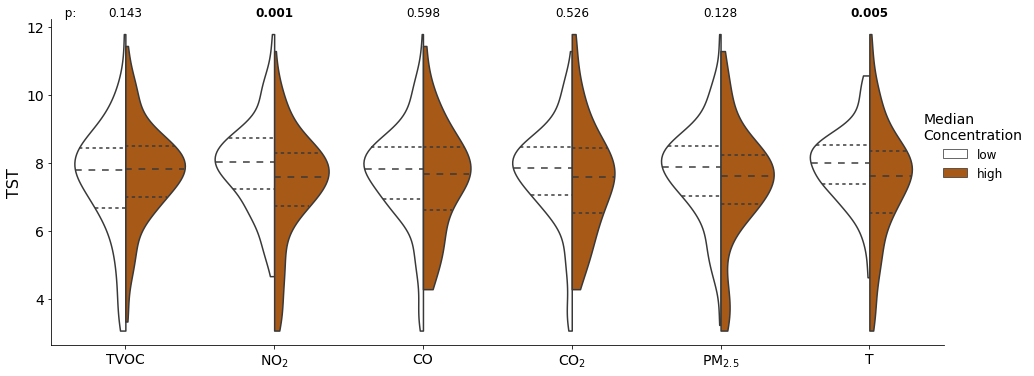

Running for: rem2nrem


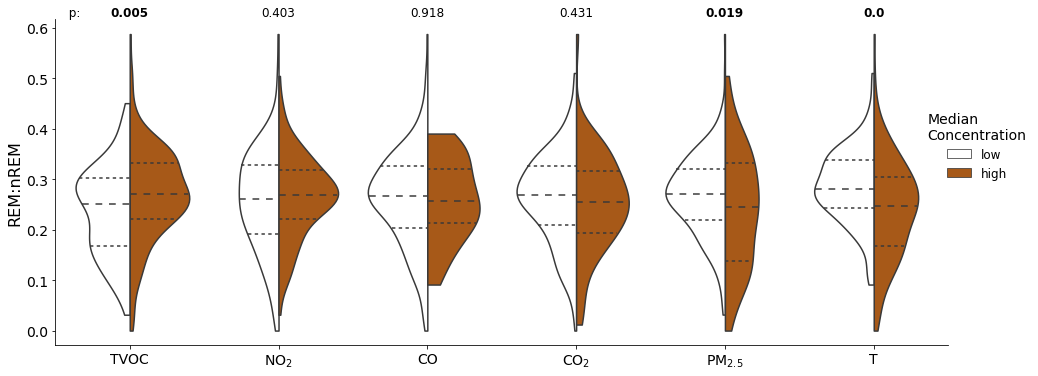

Running for: efficiency


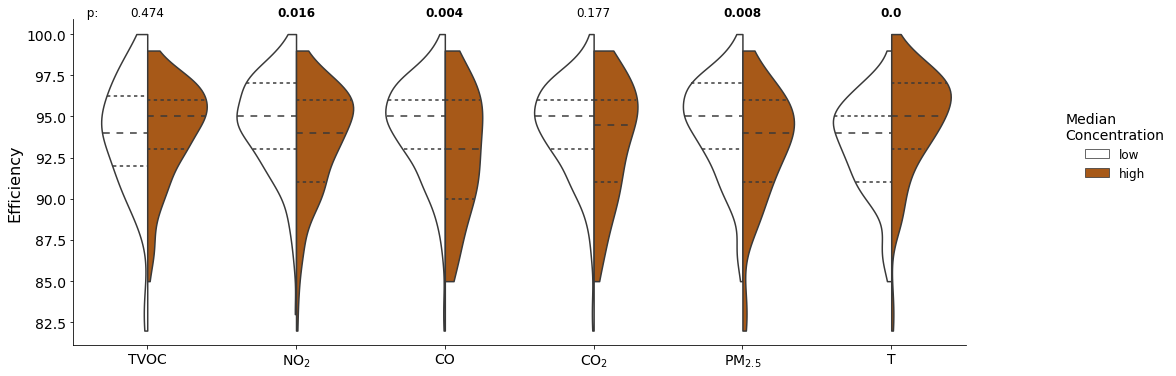

In [11]:
ieq_and_fb_sleep = ieq.merge(right=fb_sleep,on=["start_time","beiwe"])
ieq_and_fb_sleep = ieq_and_fb_sleep[ieq_and_fb_sleep["efficiency"] >= 70]
ttest_results = run_ttest_ieq_and_sleep(ieq_and_fb_sleep,save=True)

### Self-Report Sleep Metrics
Next, we see how the results change if we consider self-report sleep metrics.

#### Merging Datasets

In [12]:
beiwe_sleep["end_date"] = beiwe_sleep["timestamp"].dt.date
ieq["end_date"] = ieq["end_time"].dt.date
ieq_and_bw_sleep = ieq.merge(right=beiwe_sleep, on=["end_date","beiwe","redcap","beacon"])

#### Restful Score and IEQ

In [13]:
def plot_strip(df, pollutant_aggregate):
    """Plots stripplot of pollutant aggregate observations for the restful scores as bins"""
    fig, ax = plt.subplots(figsize=(6,4))
    sns.stripplot(x="restful",y=pollutant_aggregate,data=df,jitter=0.1,ax=ax)
    labels = ax.get_xticklabels()
    c = df["restful"].value_counts().sort_index()
    new_labels = []
    for label, count in zip(labels,c):
        new_labels.append(f"{label.get_text()[0]} ({count})")
    ax.set_xticklabels(new_labels)
    ax.set_xlabel("Restful Score")
    ax.set_ylim(bottom=0)
    ax.set_ylabel(pollutant_aggregate.replace("_"," ").title())
    for loc in ["top","right"]:
        ax.spines[loc].set_visible(False)

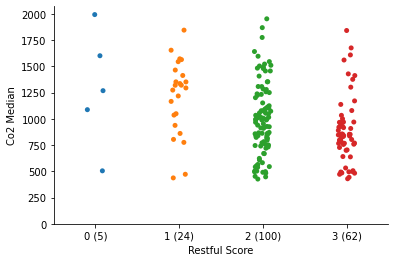

In [14]:
plot_strip(ieq_and_bw_sleep, "co2_median")

<div class="alert alert-block alert-warning">
 
This plot isn't as indicative as if we were to use a distribution plot instead.
    
</div>

In [23]:
def plot_joyplot(df, pollutant_aggregate, by_var="restful", save=False, save_dir="../reports/figures/beacon_ema"):
    """Joyplot of pollutant aggregate profile for various restful scores"""
    c = df[by_var].value_counts().sort_index()
    new_labels = []
    for i, count in enumerate(c):
        new_labels.append(f"{i} ({count})")
    fig, axes = joyplot(data=df,by=by_var,column=pollutant_aggregate,
                kind='kde',overlap=1,ylim='own',grid="y",labels=[""]*len(c),alpha=1,linewidth=2,colormap=LinearSegmentedColormap.from_list("", ["white","cornflowerblue"]),figsize=(8,6))
    agg = pollutant_aggregate.split("_")[-1]
    axes[-1].set_xlabel(f"Nightly {pollutant_aggregate.split('_')[-1].title()} {visualize.get_pollutant_label(pollutant_aggregate.split(f'_{agg}')[0])} Concentration ({visualize.get_pollutant_units(pollutant_aggregate.split(f'_{agg}')[0])})", fontsize=18)
    for ax, label in zip(axes, new_labels):
        ax.set_ylabel(label, rotation=0, va="top", fontsize=14)
        ax.set_xlim(left=0)
        
    plt.xticks(fontsize=14)
    fig.text(-0.1,0.5,"Restful Score (n)", va="center",fontsize=18,rotation=90)
    if save:
        plt.savefig(f"{save_dir}/{pollutant_aggregate}-{by_var}-joyplot.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

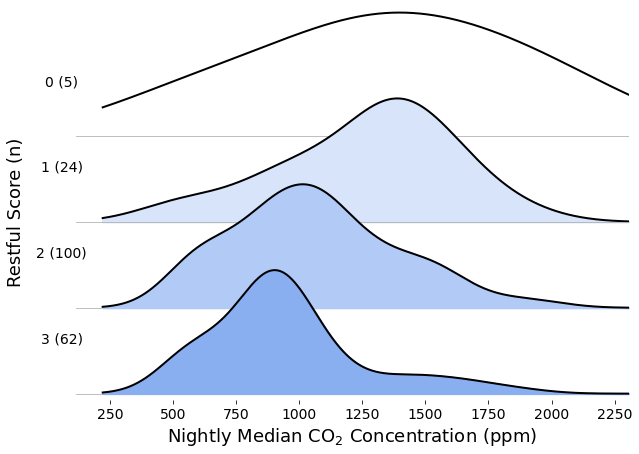

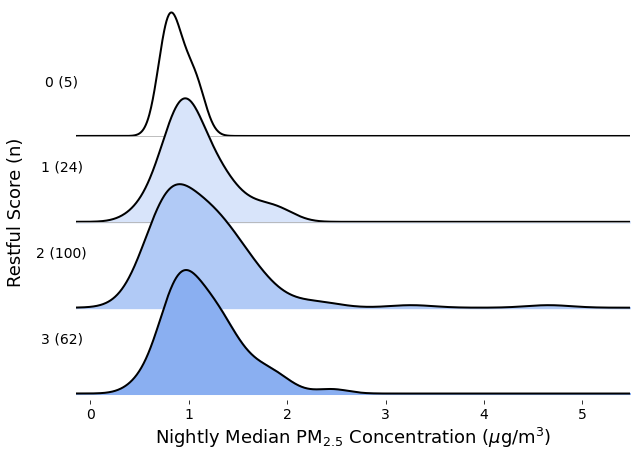

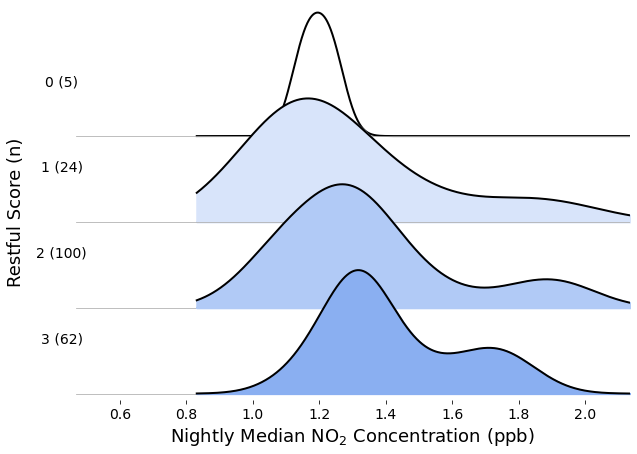

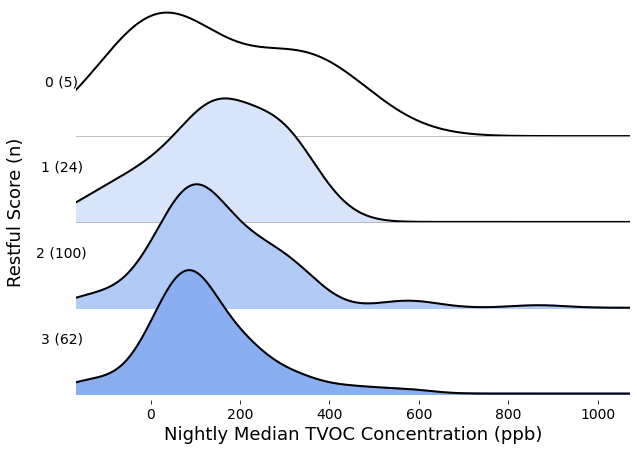

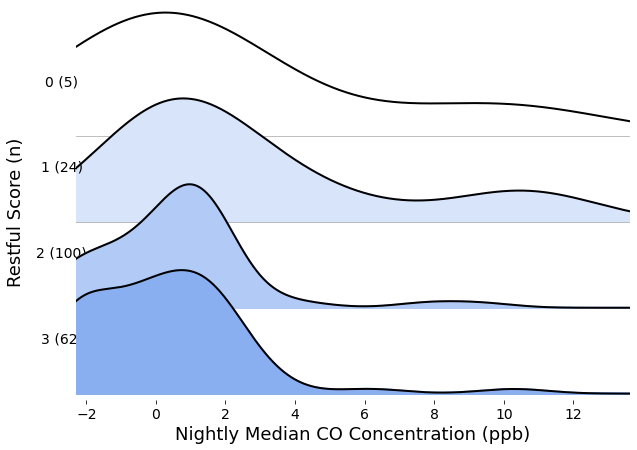

In [24]:
for pollutant in ["co2","pm2p5_mass","no2","tvoc","co"]:
    plot_joyplot(ieq_and_bw_sleep, f"{pollutant}_median")

<div class="alert alert-block alert-success">
 
It looks like there is a relationship between the restful score and CO$_2$ as well as TVOCs. Rather than looking at the four scores, we could try lumping 0 and 1 together or just doing a positive/negative response.
    
</div>

##### Restful Score as +/-

In [431]:
def plot_restful_violin(df, save=False, save_dir="../reports/figures/beacon_ema"):
    pollutant = "co2"
    fig, ax = plt.subplots(figsize=(6,6))
    df["pollutant"] = pollutant
    violin_axes = sns.violinplot(x="pollutant",y=f"{pollutant}_median",hue="restful_simple",split=True,palette=["white","cornflowerblue"],data=df,ax=ax,cut=0,inner="quartile",)
    for loc in ["right","top","bottom"]:
        ax.spines[loc].set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.get_legend().remove()
    ax.set_ylabel(f"Nightly Median {get_pollutant_label(pollutant)} Concentration ({get_pollutant_units(pollutant)})",fontsize=18)
    plt.yticks(fontsize=14)
    ax.legend(title="Restful Response",ncol=1,frameon=False,title_fontsize=14,fontsize=12)

    low_vals = df[df["restful_simple"] == "Negative"]
    high_vals = df[df["restful_simple"] == "Positive"]
    _, p = stats.ttest_ind(low_vals[f"{pollutant}_median"],high_vals[f"{pollutant}_median"], equal_var=True)

    if p > 0:
        # Annotating with p-values
        xloc = ax.get_xticks()
        weight="bold" if p < 0.05 else "normal"
        ax.text(xloc,ax.get_ylim()[1],f"{round(p,3)}",fontsize=12,ha="center",va="bottom",weight=weight)

    if save:
        plt.savefig(f"{save_dir}/{pollutant}-simplified_restful-violin.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

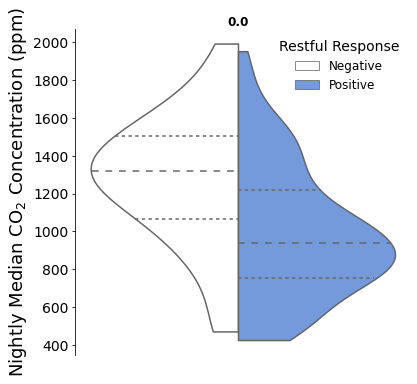

In [432]:
plot_restful_violin(ieq_and_bw_sleep, save=True)

#### Restful Score as Three-Point-Scale
Since the restful score of 0 is not really well observed, we can fold it into the 1 score.

In [241]:
ieq_and_bw_sleep["restful_new"] = [score if score != 0 else 1 for score in ieq_and_bw_sleep["restful"]]

##### CO$_2$ Only

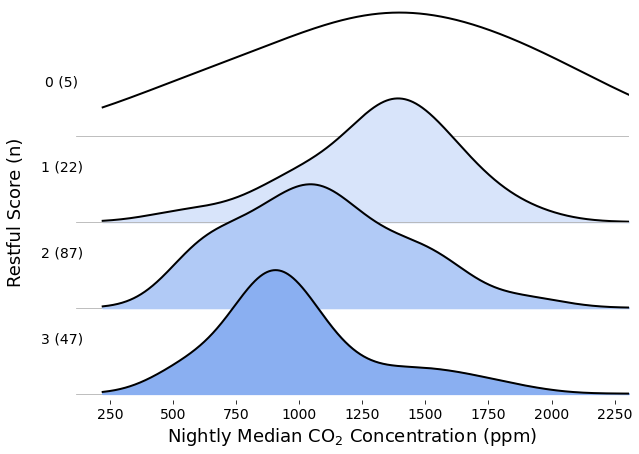

In [410]:
for pollutant in ["co2"]:
    plot_joyplot(ieq_and_bw_sleep, f"{pollutant}_median", by_var="restful", save=True)

In [190]:
co2_df = ieq_and_bw_sleep[["co2_median","restful_new"]]
co2_df.head()

,co2_median,restful_new
0,1600.754959,1.0
1,1596.122408,2.0
2,1301.449844,3.0
3,1319.535880,1.0
4,1412.926806,1.0


In [219]:
grps = pd.unique(co2_df["restful_new"].values)
d_data = {grp:co2_df["co2_median"][co2_df["restful_new"] == grp] for grp in grps}

In [220]:
f, p = stats.f_oneway(d_data[1],d_data[2],d_data[3])

In [221]:
f, p

(8.425972430837152, 0.00033338261868019525)

In [222]:
for key in d_data.keys():
    li = d_data[key]
    print(np.std(li))

351.7055912334826
351.1296569337315
322.0803558262669


In [249]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [250]:
m_comp = pairwise_tukeyhsd(endog=co2_df['co2_median'], groups=co2_df['restful_new'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   1.0    2.0 -250.6478 0.0036 -431.1331  -70.1625   True
   1.0    3.0 -338.9613  0.001 -536.8022 -141.1205   True
   2.0    3.0  -88.3135 0.3394  -236.625    59.998  False
---------------------------------------------------------
